In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/SAMHITA/OneDrive/Desktop/HEalthcare/Medicalpremium.csv")

In [3]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
df.dtypes

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

In [6]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [7]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [8]:
correlation=df.corr()

<AxesSubplot:>

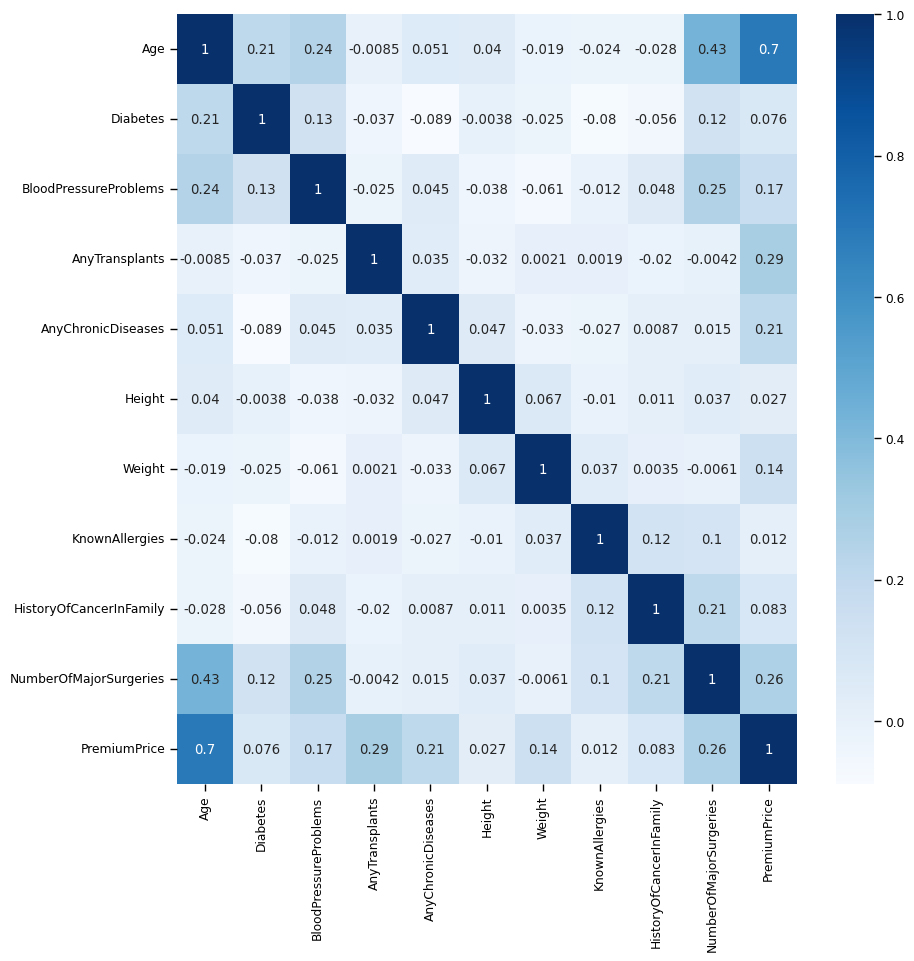

In [9]:
plt.figure(figsize=(10,10))
sns.set_context('paper',font_scale=1)
# Create a heatmap from the correlation matrix
sns.heatmap(correlation, annot=True, cmap='Blues')

from the heatmap we could conclude that, 'Age' is the highly correlated

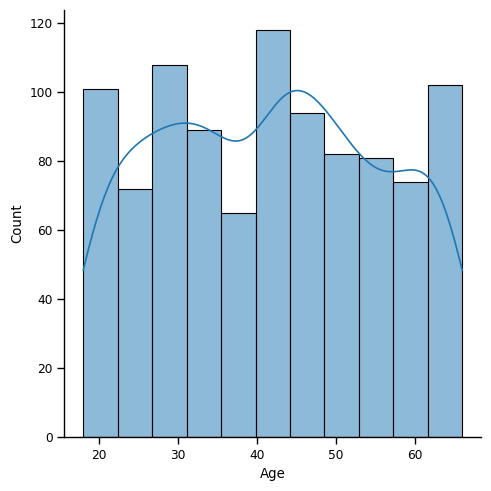

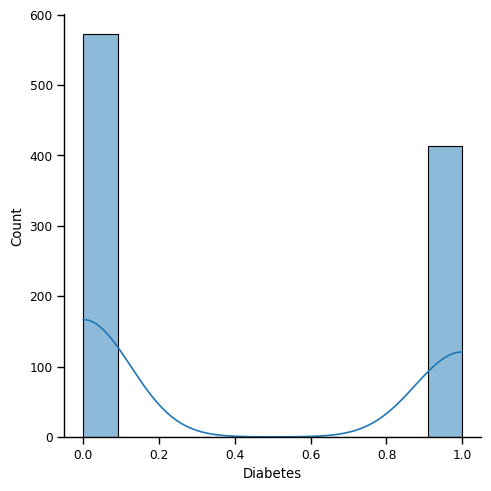

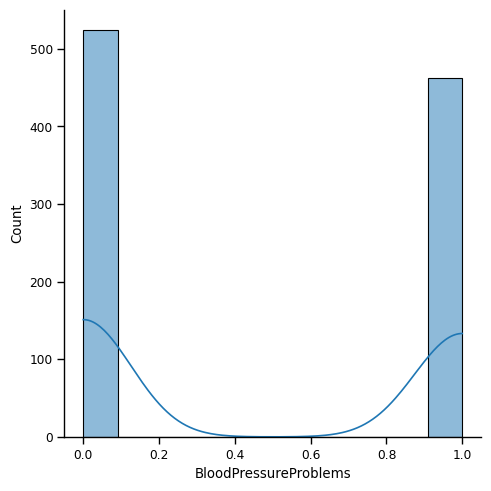

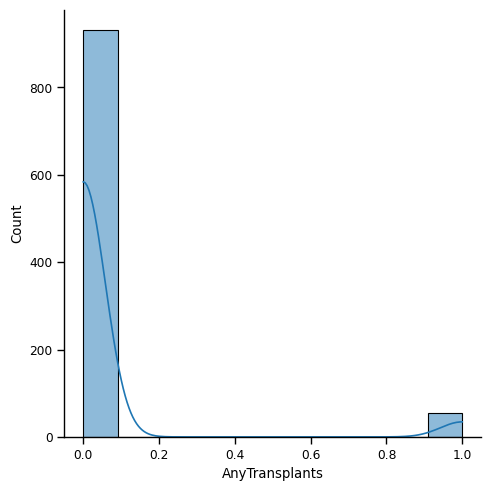

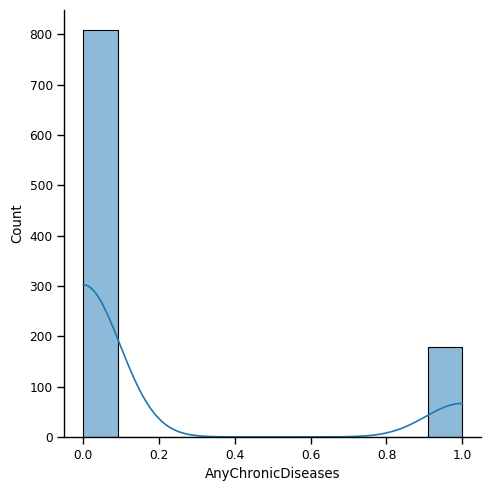

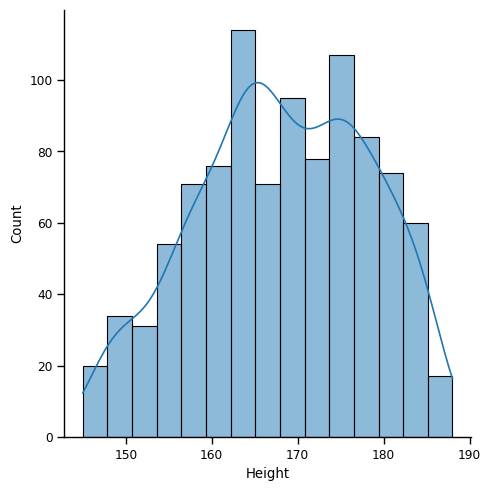

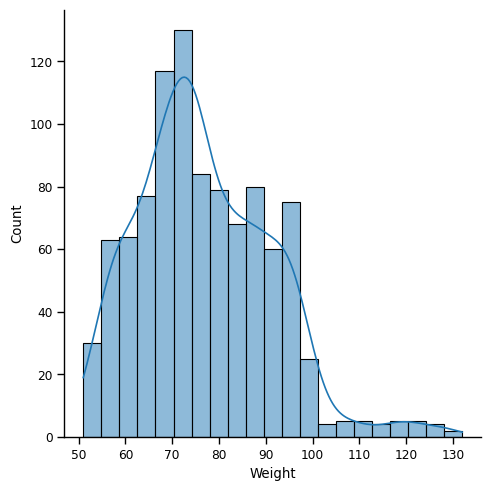

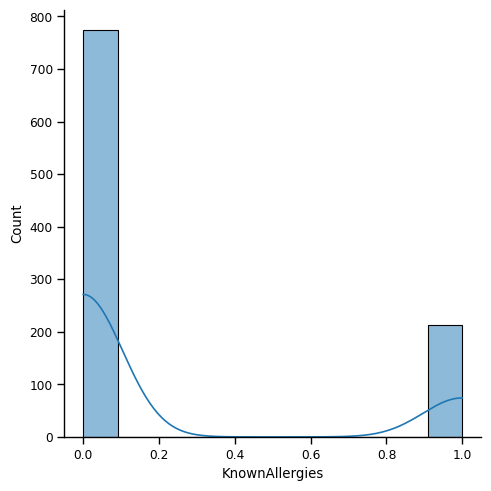

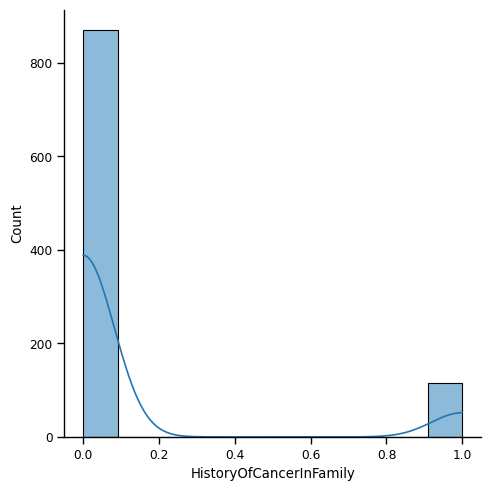

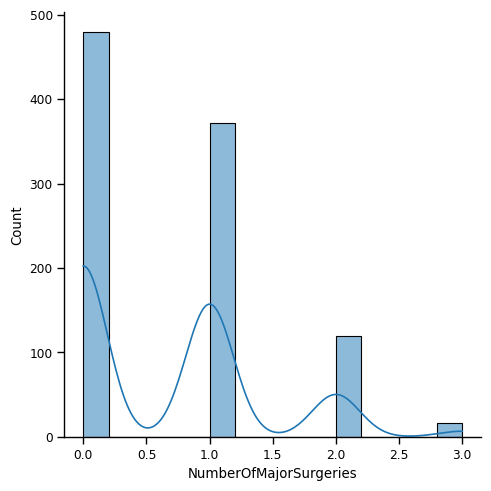

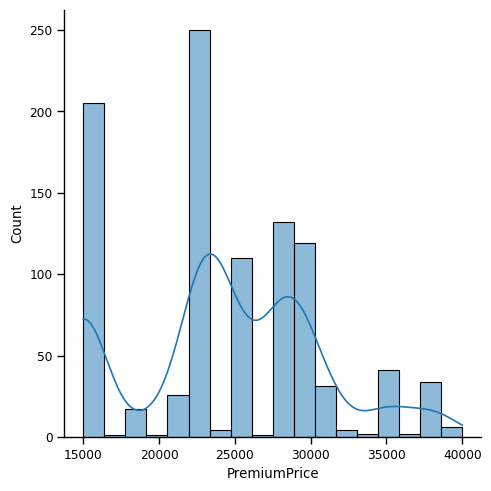

In [10]:
for i in df:
    sns.displot(df[i],kde=True)

In [11]:
## data should be transformed

'Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily' these features are discrete numeric 

other columns like age is continuous and is little bit uniformly distributed , height is bi-modal continuous numeric,weight is also continuous numeric, Number of surgeries is discrete numeric,Premium price is continuous numeric

In [12]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

TRAIN TEST SPLIT OF THE DATA

In [13]:
x=df.drop(['PremiumPrice'],axis=1)

In [14]:
y=df['PremiumPrice']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=.2,random_state=100)

DATA TRANSFORMATION 

In [17]:
from sklearn.preprocessing import power_transform

In [18]:
# apply the power transformation to the DataFrame
df = pd.DataFrame(power_transform(df), columns=df.columns)

In [19]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,0.275351,-0.850750,-0.938978,-0.243056,-0.469358,-1.286062,-1.613734,-0.523356,-0.365148,-0.996779,0.138254
1,1.273197,1.175433,-0.938978,-0.243056,-0.469358,1.192485,-0.169342,-0.523356,-0.365148,-0.996779,0.758448
2,-0.367235,1.175433,1.064988,-0.243056,-0.469358,-1.014019,-1.405023,-0.523356,-0.365148,0.737837,-0.181127
3,0.750847,1.175433,1.064988,-0.243056,2.130569,1.522721,1.130229,-0.523356,-0.365148,1.455026,0.605541
4,-0.220965,-0.850750,-0.938978,-0.243056,2.130569,-0.255029,0.843154,-0.523356,-0.365148,0.737837,-0.181127
...,...,...,...,...,...,...,...,...,...,...,...
981,-1.810505,-0.850750,-0.938978,-0.243056,-0.469358,0.042285,-0.656293,-0.523356,-0.365148,-0.996779,-1.539249
982,1.527086,1.175433,1.064988,-0.243056,-0.469358,-1.463645,-0.405809,-0.523356,-0.365148,1.864604,0.605541
983,1.014593,-0.850750,1.064988,-0.243056,-0.469358,-1.286062,-0.325497,-0.523356,-0.365148,0.737837,0.758448
984,0.413157,1.175433,1.064988,-0.243056,-0.469358,-1.014019,-0.169342,1.910744,-0.365148,0.737837,2.222636


PREDICTIVE MODEL BUILDING

Random forest regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,random_state=10,max_depth=5,min_samples_leaf=5) 

In [22]:
model.fit(x_tr,y_tr)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, random_state=10)

In [23]:
Y_pred=model.predict(x_tr)

In [24]:
y_pred_tr1=model.predict(x_tr)

In [25]:
y_pred_test1=model.predict(x_test)

In [26]:
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
r2_score(y_tr,y_pred_tr1)

0.8195771130605887

In [28]:
r2_score(y_test,y_pred_test1)

0.7503993693281417

XGB regressor

In [29]:
import xgboost as xgb

In [30]:
# Create XGBoostRegressor model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=40, max_depth=2, learning_rate=0.2)

In [31]:
# Fit model to training data
xgb_regressor.fit(x_tr, y_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=40, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [32]:
y_pred_tr2=xgb_regressor.predict(x_tr)

In [33]:
y_pred_test2=xgb_regressor.predict(x_test)

In [34]:
r2_score(y_tr,y_pred_tr2)

0.7946146366290429

In [35]:
r2_score(y_test,y_pred_test2)

0.7667789819675698

gradient boosting regressor

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=30, learning_rate=0.2, max_depth=3, random_state=0, loss='ls')


In [38]:
# Fit the model to the training data
gbr.fit(x_tr, y_tr)

C:\ANACONDA\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.2, loss='ls', n_estimators=30,
                          random_state=0)

In [39]:
y_pred_tr3=gbr.predict(x_tr)

In [40]:
y_pred_test3=gbr.predict(x_test)

In [41]:
r2_score(y_tr,y_pred_tr3)

0.856457943030983

In [42]:
r2_score(y_test,y_pred_test3)

0.7453228337245532

Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
dtree=DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [45]:
dtree.fit (x_tr, y_tr)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [46]:
y_pred_tr4=dtree.predict(x_tr)

In [47]:
y_pred_test4=dtree.predict(x_test)

In [48]:
r2_score(y_tr,y_pred_tr4)

0.795076303721915

In [49]:
r2_score(y_test,y_pred_test4)

0.7223329643556023

In [50]:
results={'model':['Random forest regressor','XGB Regressor','Gradient boost Regressor'],'R2-score(train)':[83,81,88],'R2-score(test)':[79,78,77]}

In [51]:
results_df=pd.DataFrame(results)

In [52]:
results_df

,model,R2-score(train),R2-score(test)
0,Random forest regressor,83,79
1,XGB Regressor,81,78
2,Gradient boost Regressor,88,77


In [ ]:
## amongst all the models 'XGB' boost regressor performed better though its slightly overfitting model performed well.